In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from funzioni import compute_dataset_weighted
from funzioni import compute_annual_mean_weighted
from funzioni import convert_dataset_celsius
from funzioni import compute_anomaly
from funzioni import create_djf_dataset
from funzioni import compute_mean_time_season
from funzioni import compute_mean_resample_mar
from funzioni import plot_bias_atmos
from funzioni import plot_bias_tos
from funzioni import plot_mean_cluster_atmos
from funzioni import plot_mean_cluster_tos
from funzioni import plot_bias_2_models_atmos
from funzioni import plot_bias_2_models_tos
from funzioni import plot_std_cluster_atmos
from funzioni import plot_zonavg
from funzioni import plot_zonavg_2_cluster
from funzioni import plot_mean_cluster_zonavg
from funzioni import plot_std_cluster_tos
from funzioni import plot_std_cluster_zonavg
from funzioni import bs_sample_mean
from funzioni import bs_compute_array_mean_std_5th_95th
from funzioni import plot_bs_5th_95th_mean_std
from funzioni import bs_compute_matrix10
from funzioni import plot_bs_mean_cluster_matrix10
from funzioni import compute_mean
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.express as px
import dill
import pickle
import cartopy.crs as ccrs
import random

Caricamento dei file pickle

In [2]:
# Caricamento di models e models_atmos
with open('models_atmos.pkl','rb') as file:
    models_atmos = dill.load(file)
    era_na_seas_mean = dill.load(file)
with open('modelli_atmos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0 = pickle.load(f)
    list_cluster1 = pickle.load(f)
    list_cluster2 = pickle.load(f)
    list_cluster3 = pickle.load(f)
    list_cluster4 = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    atmos_cluster0 = pickle.load(f)
    atmos_cluster1 = pickle.load(f)
    atmos_cluster2 = pickle.load(f)
    atmos_cluster3 = pickle.load(f)
    atmos_cluster4 = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    atmos_cluster0_mean = pickle.load(f)
    atmos_cluster1_mean = pickle.load(f)
    atmos_cluster2_mean = pickle.load(f)
    atmos_cluster3_mean = pickle.load(f)
    atmos_cluster4_mean = pickle.load(f)

    #Caricamento dei cluster standard deviation in formato pdf
    atmos_cluster0_std = pickle.load(f)
    atmos_cluster1_std = pickle.load(f)
    atmos_cluster2_std = pickle.load(f)
    atmos_cluster3_std = pickle.load(f)
    atmos_cluster4_std = pickle.load(f)

In [3]:
# Salvataggio in un file Pickle
with open('bootstrap.pickle', 'rb') as f: #'rb' = read binary
    array_5th_cluster0 = pickle.load(f) #cluster0
    array_95th_cluster0 = pickle.load(f) #cluster0
    array_mean_cluster0= pickle.load(f) #cluster0
    array_std_cluster0 = pickle.load(f) #cluster0
    matrix10_cluster0 = pickle.load(f) #cluster0
    
    array_5th_cluster1 = pickle.load(f) #cluster1
    array_95th_cluster1 = pickle.load(f) #cluster1
    array_mean_cluster1= pickle.load(f) #cluster1
    array_std_cluster1 = pickle.load(f) #cluster1
    matrix10_cluster1 = pickle.load(f) #cluster1

    array_5th_cluster2 = pickle.load(f) #cluster2
    array_95th_cluster2 = pickle.load(f) #cluster2
    array_mean_cluster2= pickle.load(f) #cluster2
    array_std_cluster2 = pickle.load(f) #cluster2
    matrix10_cluster2 = pickle.load(f) #cluster2

    array_5th_cluster3 = pickle.load(f) #cluster3
    array_95th_cluster3 = pickle.load(f) #cluster3
    array_mean_cluster3= pickle.load(f) #cluster3
    array_std_cluster3 = pickle.load(f) #cluster3
    matrix10_cluster3 = pickle.load(f) #cluster3

    array_5th_cluster4 = pickle.load(f) #cluster4
    array_95th_cluster4 = pickle.load(f) #cluster4
    array_mean_cluster4= pickle.load(f) #cluster4
    array_std_cluster4 = pickle.load(f) #cluster4
    matrix10_cluster4 = pickle.load(f) #cluster4

Mean_bias (cluster originale) - array_mean

Cluster 0

In [4]:
mean_bias_cluster0 = compute_mean(list_cluster0,models_atmos)
diff_cluster0 = mean_bias_cluster0 - array_mean_cluster0

In [12]:
#plot di diff, cioè la differenza tra il cluster medio e la media della distribuzione bootstrap
def plot_bs_diff_cluster(diff,title_plot,v_min,v_max,fig_size): #name_models_to_plot indica la lista in cui sono racchiusi i nomi dei modelli da plottare, name_dict è o models_atmos
    plot_mod = diff[0].plot.pcolormesh(figsize=fig_size,vmin=v_min, vmax=v_max,cmap='seismic',
    subplot_kws={"projection":ccrs.PlateCarree()})  #trasformazione cartografica = lonxlat   
    #valori assi            
    plt.xticks(np.arange(diff[0].lon.min(),diff[0].lon.max(), 20))
    plt.yticks(np.arange(diff[0].lat.min(),diff[0].lat.max(), 10))
    plt.gca().coastlines() #gca = get current axis
    plt.ylabel('latitude')
    plt.xlabel('longitude')
    # Titolo
    plt.suptitle(title_plot, fontsize=16, y=1.02)

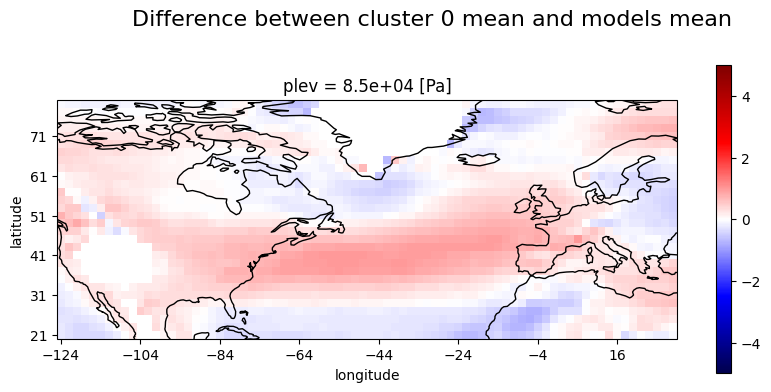

In [25]:
plot_bs_diff_cluster(diff_cluster0,'Difference between cluster 0 mean and models mean',-5,5,(10,4))

Cluster 1

In [5]:
mean_bias_cluster1 = compute_mean(list_cluster1,models_atmos)
diff_cluster1 = mean_bias_cluster1 - array_mean_cluster1

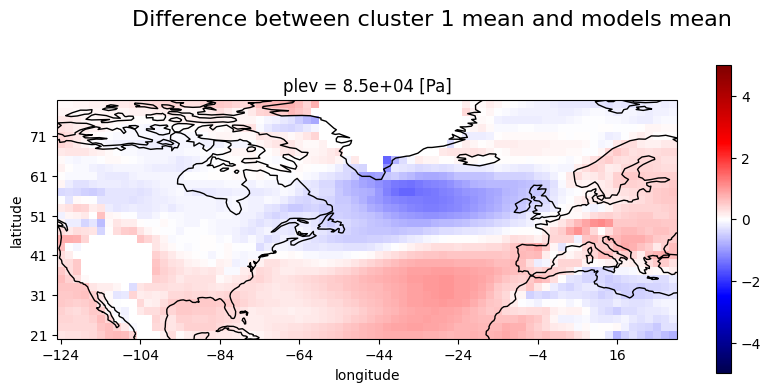

In [24]:
plot_bs_diff_cluster(diff_cluster1,'Difference between cluster 1 mean and models mean',-5,5,(10,4))

Cluster 2

In [6]:
mean_bias_cluster2 = compute_mean(list_cluster2,models_atmos)
diff_cluster2 = mean_bias_cluster2 - array_mean_cluster2

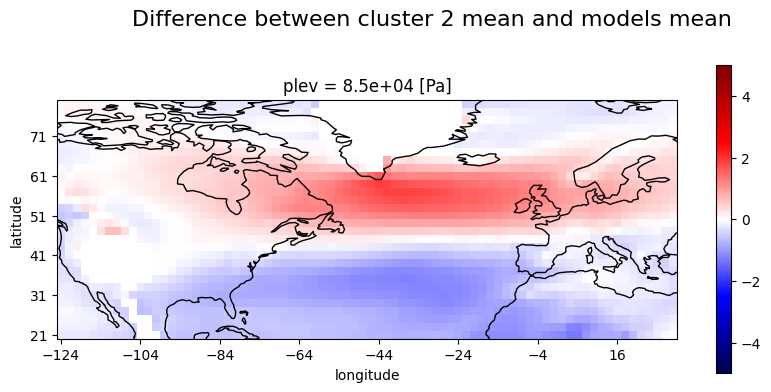

In [23]:
plot_bs_diff_cluster(diff_cluster2,'Difference between cluster 2 mean and models mean',-5,5,(10,4))

Cluster 3

In [7]:
mean_bias_cluster3 = compute_mean(list_cluster3,models_atmos)
diff_cluster3 = mean_bias_cluster3 - array_mean_cluster3

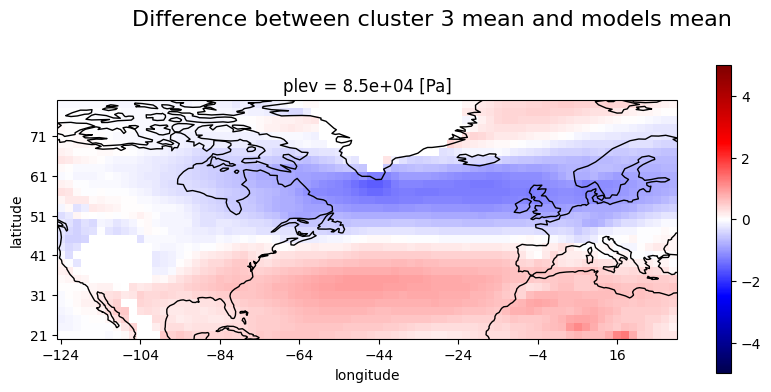

In [22]:
plot_bs_diff_cluster(diff_cluster3,'Difference between cluster 3 mean and models mean',-5,5,(10,4))

Cluster 4

In [8]:
mean_bias_cluster4 = compute_mean(list_cluster4,models_atmos)
diff_cluster4 = mean_bias_cluster4 - array_mean_cluster4

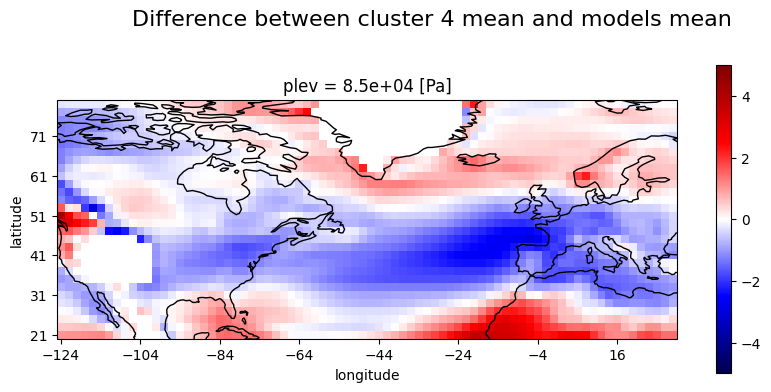

In [21]:
plot_bs_diff_cluster(diff_cluster4,'Difference between cluster 4 mean and models mean',-5,5,(10,4))